Name - Rutik Kothwala
UID - U01868702
Subject - CS668, Analytics Capstone

# Data Importing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.util import ngrams
import string
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [3]:
drugs_reviews_train= pd.read_csv("C:/Users/rutik/Downloads/drug+review+dataset+drugs+com (1)/drugsComTrain_raw.tsv", sep='\t')

In [4]:
drugs_reviews_train

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


In [5]:
drugs_reviews_test= pd.read_csv("C:/Users/rutik/Downloads/drug+review+dataset+drugs+com (1)/drugsComTest_raw.tsv", sep='\t')

In [6]:
drugs_reviews_test

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10.0,"September 13, 2014",43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0,"October 8, 2016",11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8.0,"November 15, 2010",7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1.0,"November 28, 2011",20


In [7]:
# Concatenating the dataframes
drugs_reviews = pd.concat([drugs_reviews_train, drugs_reviews_test])

In [8]:
drugs_reviews 

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10.0,"September 13, 2014",43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0,"October 8, 2016",11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8.0,"November 15, 2010",7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1.0,"November 28, 2011",20


In [9]:
drugs_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   215063 non-null  int64  
 1   drugName     215063 non-null  object 
 2   condition    213869 non-null  object 
 3   review       215063 non-null  object 
 4   rating       215063 non-null  float64
 5   date         215063 non-null  object 
 6   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


In [10]:
drugs_reviews=drugs_reviews.drop('Unnamed: 0',axis=1)

In [11]:
drugs_reviews.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [12]:
drugs_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215063 entries, 0 to 53765
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     215063 non-null  object 
 1   condition    213869 non-null  object 
 2   review       215063 non-null  object 
 3   rating       215063 non-null  float64
 4   date         215063 non-null  object 
 5   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 11.5+ MB


In [13]:
drugs_reviews.isnull().sum()

drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [14]:
drugs_reviews[drugs_reviews.isnull().any(axis=1)]

,drugName,condition,review,rating,date,usefulCount
30,Azithromycin,NaN,"""Very good response. It is so useful for me. """,10.0,"August 18, 2010",1
148,Urea,NaN,"""Accurate information.""",10.0,"July 2, 2011",13
488,Doxepin,NaN,"""So far so good. Good for me and I can take it...",10.0,"October 20, 2010",25
733,Ethinyl estradiol / norgestimate,NaN,"""I haven&#039;t been on it for a long time and...",8.0,"January 24, 2011",1
851,Medroxyprogesterone,NaN,"""I started the shot in July 2015 and ended in ...",6.0,"March 23, 2017",1
...,...,...,...,...,...,...
52424,Quetiapine,NaN,"""good for insomnia most of the time""",7.0,"May 27, 2015",10
52488,Ethinyl estradiol / levonorgestrel,NaN,"""I am almost on my third month of my first pac...",5.0,"April 25, 2011",4
52617,Ethinyl estradiol / levonorgestrel,NaN,"""I have been taking this birth control for two...",10.0,"January 11, 2011",1
52742,Medroxyprogesterone,NaN,"""I have been using the shot for 7 years now an...",10.0,"April 21, 2011",1


In [15]:
drugs_reviews=drugs_reviews.dropna()

In [16]:
drugs_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213869 entries, 0 to 53765
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     213869 non-null  object 
 1   condition    213869 non-null  object 
 2   review       213869 non-null  object 
 3   rating       213869 non-null  float64
 4   date         213869 non-null  object 
 5   usefulCount  213869 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 11.4+ MB


# Exploratory Data Analysis

In [17]:
# Counting  Unique drugs

In [18]:
unique_drugs=drugs_reviews['drugName'].value_counts()

In [19]:
unique_drugs

drugName
Levonorgestrel                       4896
Etonogestrel                         4402
Ethinyl estradiol / norethindrone    3619
Nexplanon                            2892
Ethinyl estradiol / norgestimate     2682
                                     ... 
Hemin                                   1
Melpaque HP                             1
Cortisone                               1
Reyataz                                 1
Allergy DN PE                           1
Name: count, Length: 3667, dtype: int64

In [20]:
total_unique_drugs = drugs_reviews['drugName'].nunique()

In [21]:
total_unique_drugs

3667

In [22]:
# So There are in total 3667 types of unique drugs in our data set

In [23]:
# Counting  Unique Condition

In [24]:
unique_condition=drugs_reviews['condition'].value_counts()

In [25]:
unique_condition

condition
Birth Control                                   38436
Depression                                      12164
Pain                                             8245
Anxiety                                          7812
Acne                                             7435
                                                ...  
Systemic Candidiasis                                1
Wilson's Disease                                    1
unctional Gastric Disorde                           1
Sepsis                                              1
105</span> users found this comment helpful.        1
Name: count, Length: 916, dtype: int64

In [26]:
total_unique_condition = drugs_reviews['condition'].nunique()

In [27]:
total_unique_condition

916

In [28]:
# So There are in total 916 types of unique condition in our data set

In [29]:
# Counting drugs per condition

In [30]:
drugs_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213869 entries, 0 to 53765
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     213869 non-null  object 
 1   condition    213869 non-null  object 
 2   review       213869 non-null  object 
 3   rating       213869 non-null  float64
 4   date         213869 non-null  object 
 5   usefulCount  213869 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 11.4+ MB


In [31]:
drugs_per_condition = drugs_reviews.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

In [32]:

colors = plt.cm.spring(range(len(drugs_per_condition)))  


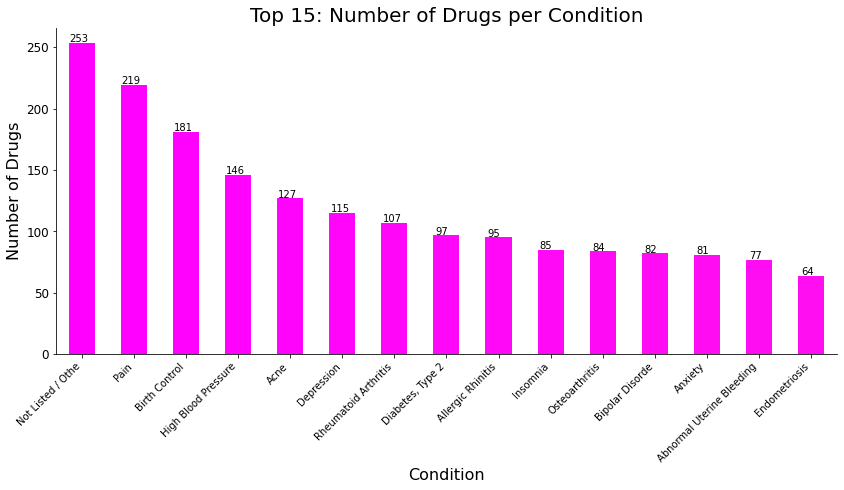

In [33]:
plt.figure(figsize=(14, 6))
ax = drugs_per_condition[:15].plot(kind="bar", x='Condition', y='Count', color=colors, legend=False)


plt.xlabel("Condition", fontsize=16)
plt.ylabel("Number of Drugs", fontsize=16)
plt.title("Top 15: Number of Drugs per Condition", fontsize=20)

plt.xticks(rotation=45, ha='right')  
plt.yticks(fontsize=12)  

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=10)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

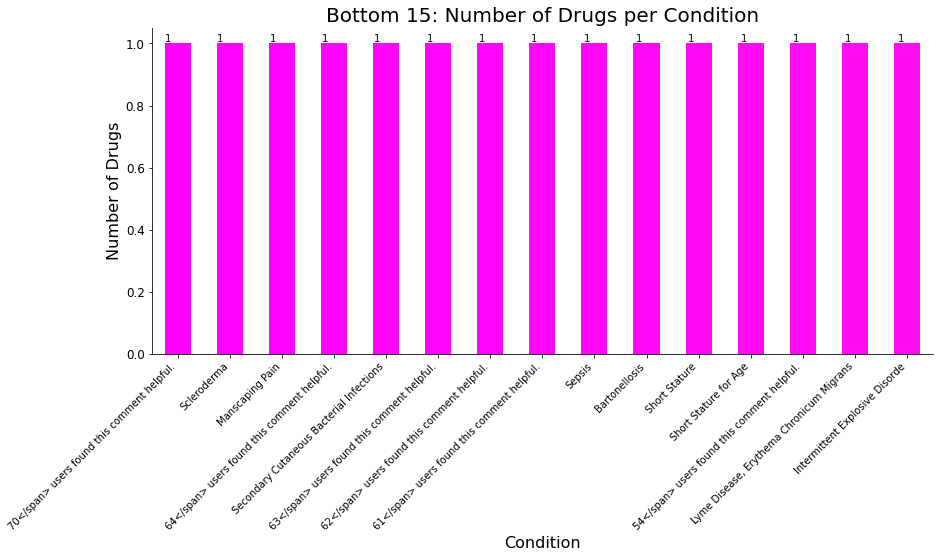

In [34]:
plt.figure(figsize=(14, 6))

ax = drugs_per_condition[drugs_per_condition.shape[0]-15:drugs_per_condition.shape[0]].plot(kind="bar", x='Condition', y='Count', color=colors, legend=False)


plt.xlabel("Condition", fontsize=16)
plt.ylabel("Number of Drugs", fontsize=16)
plt.title("Bottom 15: Number of Drugs per Condition", fontsize=20)

plt.xticks(rotation=45, ha='right')  
plt.yticks(fontsize=12)  


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=10)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

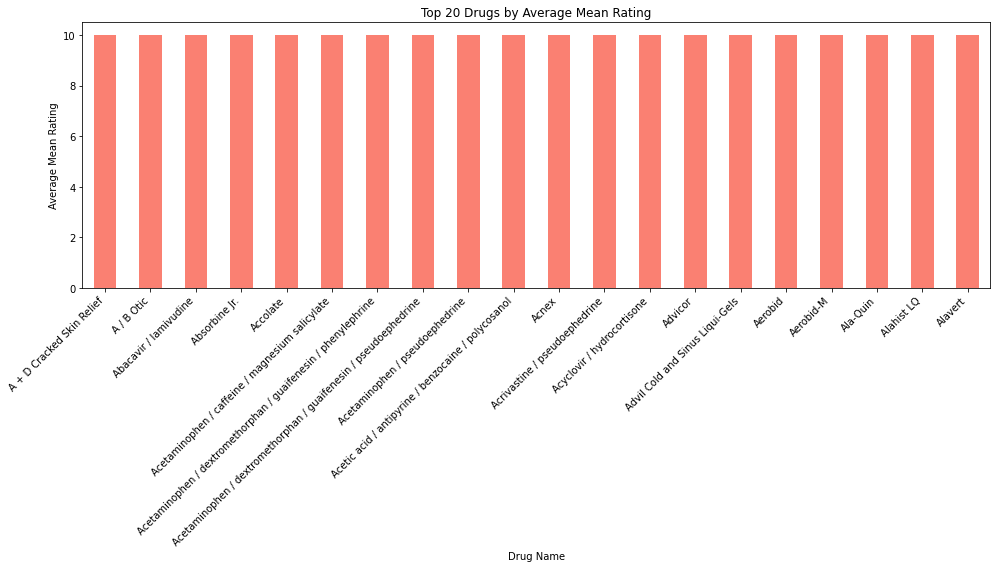

In [35]:
mean_ratings = drugs_reviews.groupby('drugName')['rating'].mean()


top_20_drugs = mean_ratings.nlargest(20)

plt.figure(figsize=(14, 8))
top_20_drugs.plot(kind='bar', color='salmon')
plt.title('Top 20 Drugs by Average Mean Rating')
plt.xlabel('Drug Name')
plt.ylabel('Average Mean Rating')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

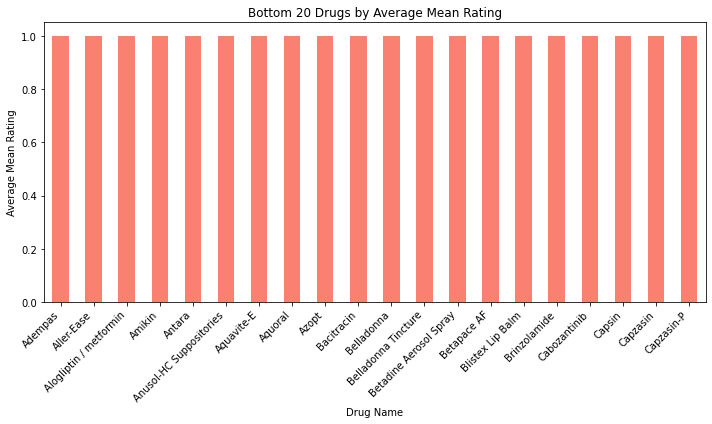

In [36]:
mean_ratings = drugs_reviews.groupby('drugName')['rating'].mean()


bottom_20_drugs = mean_ratings.nsmallest(20)


plt.figure(figsize=(10, 6))
bottom_20_drugs.plot(kind='bar', color='salmon')
plt.title('Bottom 20 Drugs by Average Mean Rating')
plt.xlabel('Drug Name')
plt.ylabel('Average Mean Rating')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

removing unwanted condition as some condition are name as Not Listed / oth, some are in the form r'\d+</span> users found this comment helpful and condition with only one drug as this are notuseful for our recommendation system

In [37]:
condition_counts = drugs_reviews.groupby('condition')['drugName'].nunique()
conditions_to_remove = condition_counts[condition_counts == 1].index
drugs_reviews = drugs_reviews[~drugs_reviews['condition'].isin(conditions_to_remove)]

In [38]:
drugs_reviews = drugs_reviews[drugs_reviews['condition'] != 'Not Listed / Othe']


In [39]:
pattern = r'\d+</span> users found this comment helpful.'
mask = drugs_reviews['condition'].str.contains(pattern)
drugs_reviews= drugs_reviews[~mask]
drugs_reviews.reset_index(drop=True, inplace=True)
print(drugs_reviews.head())

                   drugName                     condition  \
0                 Valsartan  Left Ventricular Dysfunction   
1                Guanfacine                          ADHD   
2                    Lybrel                 Birth Control   
3                Ortho Evra                 Birth Control   
4  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37  


In [40]:
# Analysing drugs_review

In [41]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'Word cloud for Drugs Reviews')

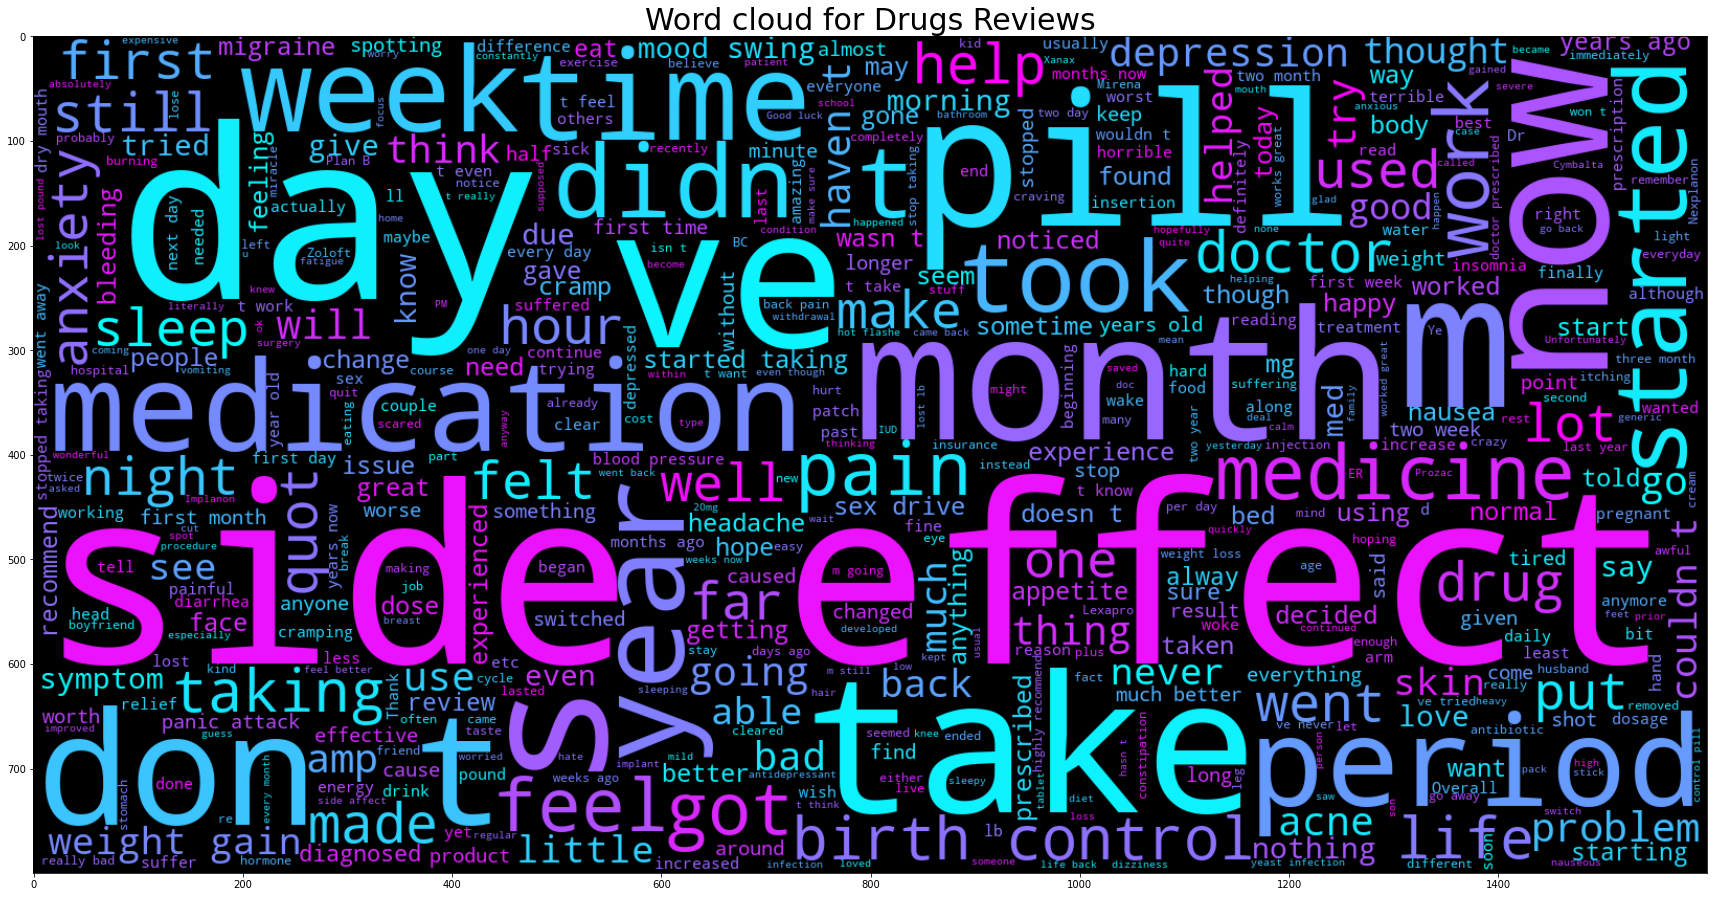

In [42]:
plt.figure(figsize = (30,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800,colormap='cool').generate(" ".join(drugs_reviews.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Drugs Reviews',fontsize=30)

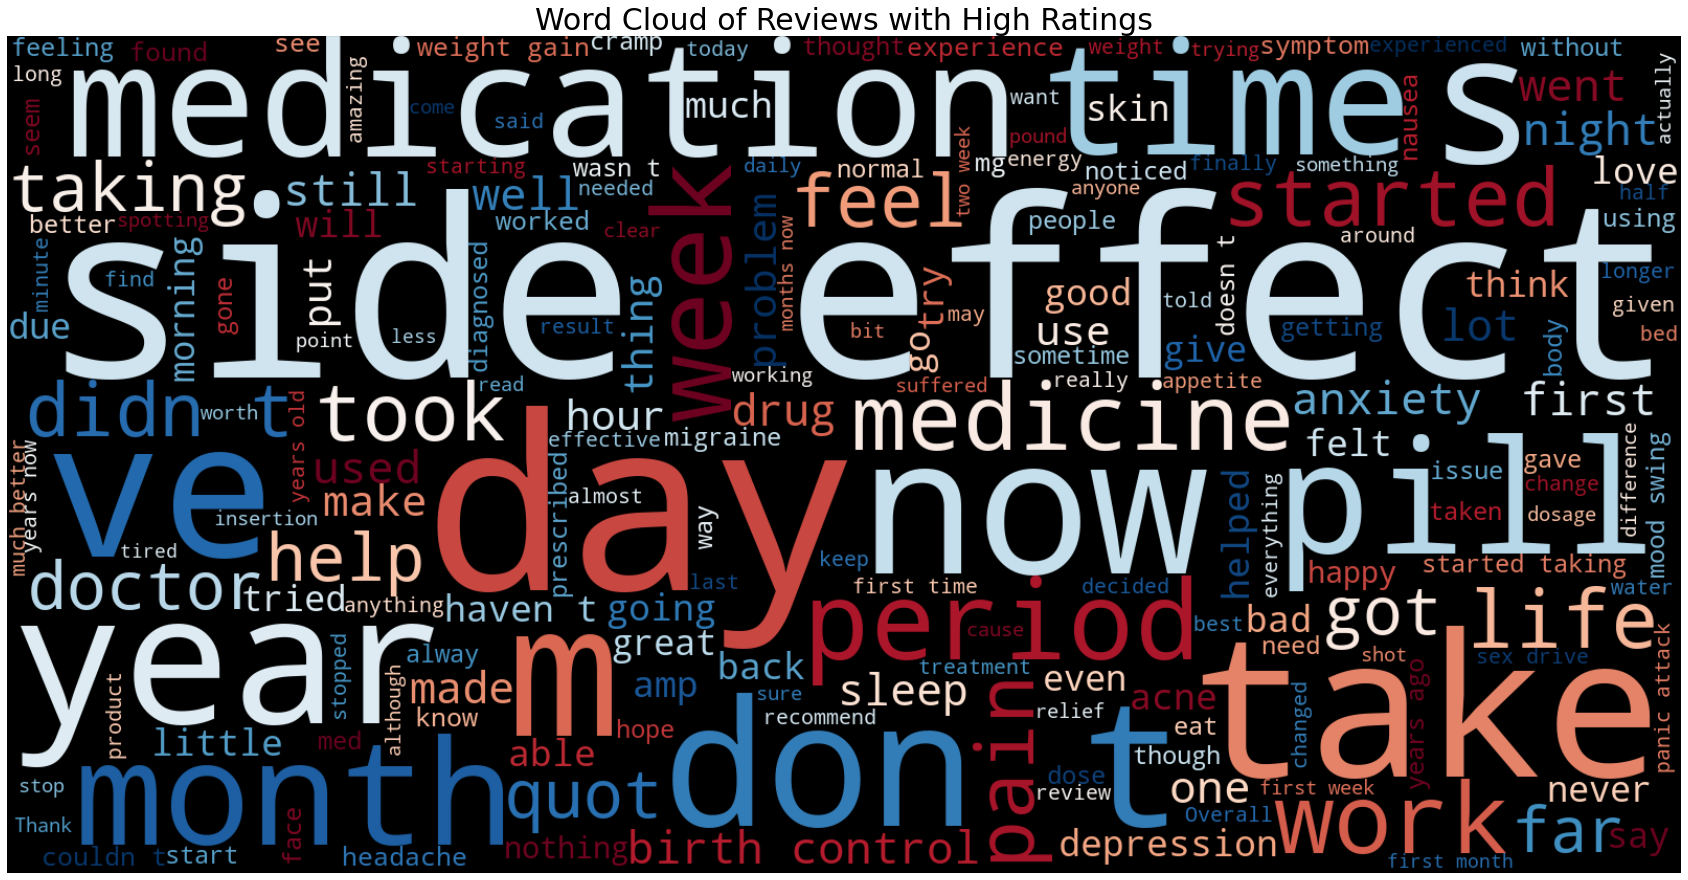

In [43]:
# Generate word cloud for reviews with high ratings (e.g., rating >= 8)
high_rating_reviews = drugs_reviews[drugs_reviews['rating'] >= 8]['review']
wordcloud = WordCloud(width=1600, height=800, colormap='RdBu_r').generate(' '.join(high_rating_reviews))
plt.figure(figsize = (30,20)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews with High Ratings',fontsize=30)
plt.axis('off')
plt.show()

In [44]:
# Analyszing Drugs review rating distribution

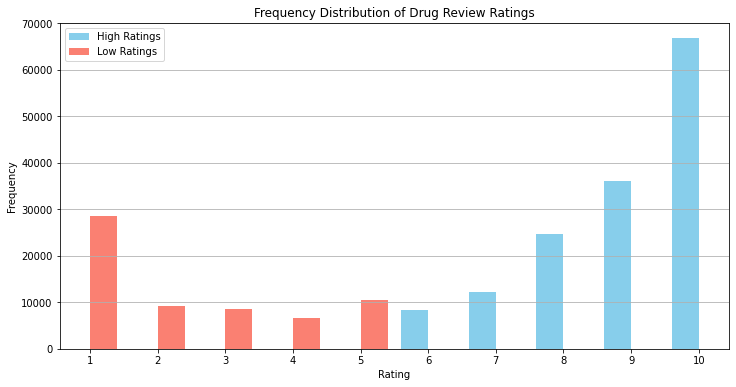

In [45]:
import matplotlib.pyplot as plt

# Classify ratings into highest and lowest categories
highest_ratings = drugs_reviews[(drugs_reviews['rating'] >= 6) & (drugs_reviews['rating'] <= 10)]
lowest_ratings = drugs_reviews[(drugs_reviews['rating'] >= 1) & (drugs_reviews['rating'] <= 5)]

# Count the frequency of ratings for each category
highest_rating_counts = highest_ratings['rating'].value_counts().sort_index()
lowest_rating_counts = lowest_ratings['rating'].value_counts().sort_index()

# Plotting the frequency distribution of ratings for highest and lowest categories
plt.figure(figsize=(12, 6))

# Plot highest ratings
plt.bar(highest_rating_counts.index - 0.2, highest_rating_counts.values, width=0.4, color='skyblue', label='High Ratings')

# Plot lowest ratings
plt.bar(lowest_rating_counts.index + 0.2, lowest_rating_counts.values, width=0.4, color='salmon', label='Low Ratings')

plt.title('Frequency Distribution of Drug Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 11))
plt.grid(axis='y')
plt.legend()
plt.show()


In [46]:
# Reviews Per Date

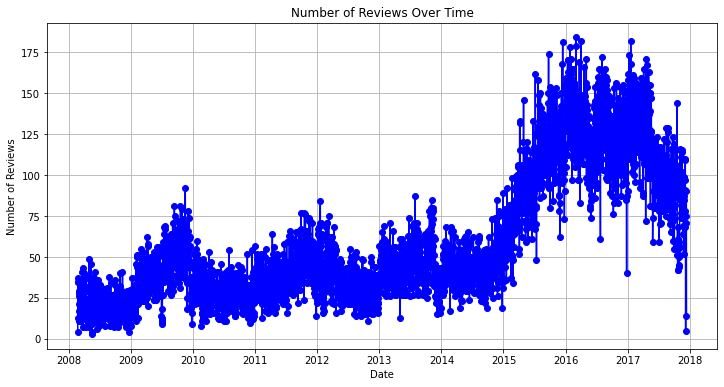

In [47]:


# Convert 'date' column to datetime type
drugs_reviews['date'] = pd.to_datetime(drugs_reviews['date'])

# Group by date and count the number of reviews for each date
reviews_per_date = drugs_reviews.groupby(drugs_reviews['date'].dt.date).size()

# Plot the time series of review counts
plt.figure(figsize=(12, 6))
plt.plot(reviews_per_date.index, reviews_per_date.values, color='blue', marker='o', linestyle='-')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


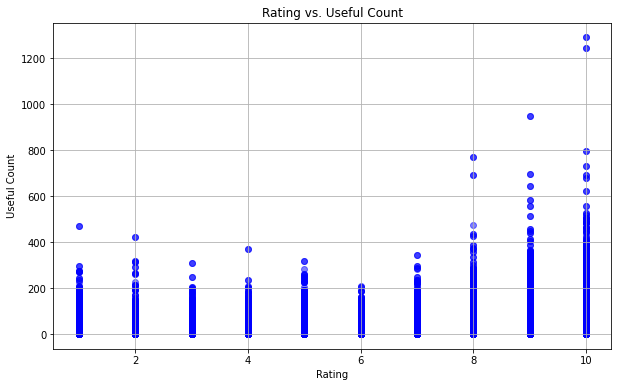

In [48]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(drugs_reviews['rating'], drugs_reviews['usefulCount'], color='blue', alpha=0.5)
plt.title('Rating vs. Useful Count')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.grid(True)
plt.show()


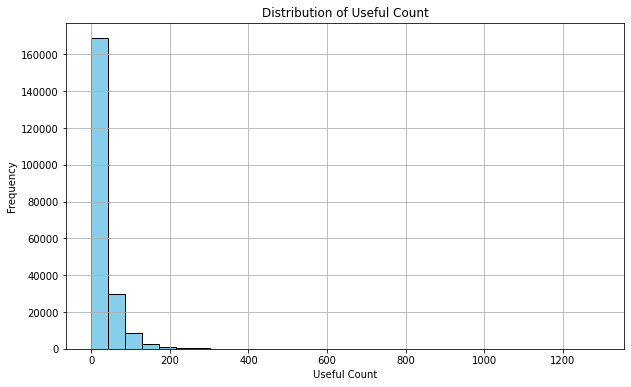

In [49]:
# Plotting the distribution of useful count
plt.figure(figsize=(10, 6))
plt.hist(drugs_reviews['usefulCount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Useful Count')
plt.xlabel('Useful Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [50]:
# Hence the distribution of useful count is highly uneven so its need to be normalized

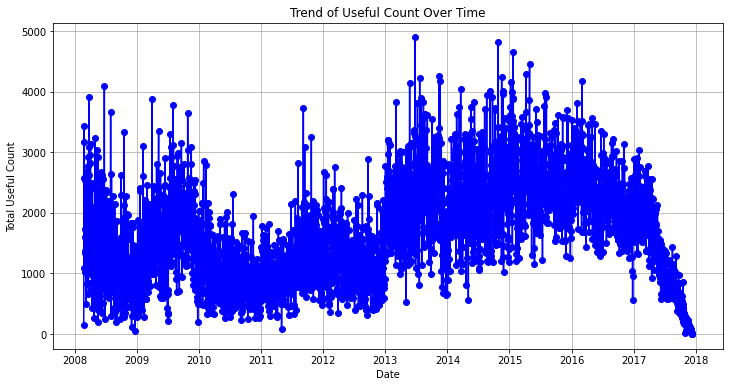

In [51]:
# Group by date and sum the useful count for each date
useful_count_per_date = drugs_reviews.groupby(drugs_reviews['date'].dt.date)['usefulCount'].sum()

# Plot the trend of useful count over time
plt.figure(figsize=(12, 6))
plt.plot(useful_count_per_date.index, useful_count_per_date.values, color='blue', marker='o', linestyle='-')
plt.title('Trend of Useful Count Over Time')
plt.xlabel('Date')
plt.ylabel('Total Useful Count')
plt.grid(True)
plt.show()


In [53]:
# Convert rating column to positive (1) or negative (0)
sentiment_counts = drugs_reviews['rating'].apply(lambda x: 1 if x >= 6 else 0)

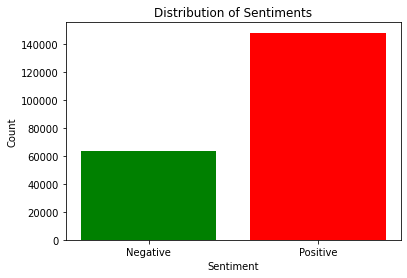

In [54]:

# Count the occurrences of each sentiment
sentiment_counts = sentiment_counts.value_counts()

# Create a bar plot
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'green'])

# Add labels and title
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])

# Show the plot
plt.show()

# Data Preprocessing 

In [54]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Perform stemming 
    porter = PorterStemmer()
    stemmed_tokens = [porter.stem(word) for word in filtered_tokens]
    # Join tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text

# Apply text preprocessing to the 'review' column
drugs_reviews['preprocessed_review'] = drugs_reviews['review'].apply(preprocess_text)

In [55]:
drugs_reviews.head()

,drugName,condition,review,rating,date,usefulCount,preprocessed_review
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27,side effect take combin bystol 5 mg fish oil
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192,son halfway fourth week intuniv becam concern ...
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17,use take anoth oral contracept 21 pill cycl ha...
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10,first time use form birth control i039m glad w...
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37,suboxon complet turn life around feel healthie...


In [58]:
drugs_reviews.to_csv('C:/Users/rutik/Downloads/drugs_reviews.csv') #Saving the drugs_reviews file

In [105]:
# Have used the above  drugs_reviews data set for feature extraction and modelling. 